<a href="https://colab.research.google.com/github/HIRAL13CHOKSI/Product-Length-AMAZON-CHALLENGE/blob/main/PRODUCT_LENGTH_AMAZON_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon ML Challenge** - HIRAL CHOKSI


---



---


## Team Name: *Dataholics*
## Problem Statement: *Product Length Prediction*

### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Loading the data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

In [ ]:
train_data

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


### Feature Engineering

In [ ]:
df2 = train_data.loc[:, ['PRODUCT_ID', 'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH']]
df2

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,1650,2125.980000
1,2673191,2755,393.700000
2,2765088,7537,748.031495
3,1594019,2996,787.401574
4,283658,6112,598.424000
...,...,...,...
2249693,2422167,3009,1181.100000
2249694,2766635,3413,125.984252
2249695,1987786,1574,1200.000000
2249696,1165754,592,2900.000000


### Data Preprocessing

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.duplicated().sum()

0

### Data Visualization and Data Cleaning

<Axes: xlabel='PRODUCT_TYPE_ID', ylabel='PRODUCT_LENGTH'>

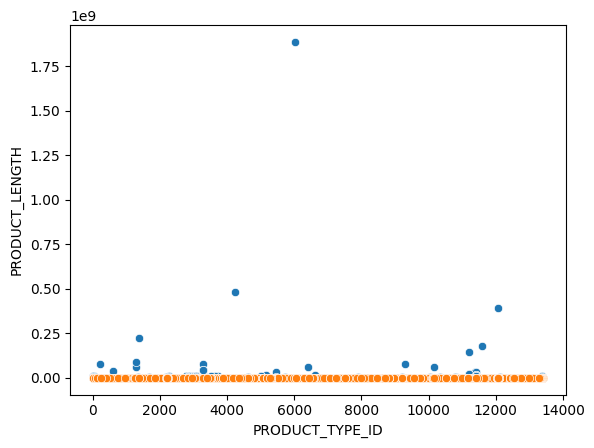

In [ ]:
import seaborn as sns

sns.scatterplot(data=df2, x="PRODUCT_TYPE_ID", y="PRODUCT_LENGTH")

# Removing outliers
df2 = df2[df2["PRODUCT_LENGTH"] <= 900]

# Graph without any outliers
sns.scatterplot(data=df2, x="PRODUCT_TYPE_ID", y="PRODUCT_LENGTH")

### Splitting into training and testing data

In [ ]:
x = df2.iloc[:, [0,1]]
y = df2.loc[:,'PRODUCT_LENGTH']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

### Training Model 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
predictions = model.predict(x_test)
predictions

array([610.      , 598.424   , 200.      , ..., 225.      , 393.700787,
       400.      ])

### Evaluating model

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

error = mean_absolute_percentage_error(y_test, predictions)
score = max( 0 , 100*(1- mean_absolute_percentage_error(y_test,predictions)))
error

1.0238015346479998

### Training and testing on 'test.csv' dataset

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')
x_train = df2.iloc[:, [0,1]]
x_test = test_data.loc[:,['PRODUCT_ID', 'PRODUCT_TYPE_ID']]
y_train = df2.loc[:, 'PRODUCT_LENGTH']

In [ ]:
model_final = DecisionTreeRegressor()

model_final.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
predictions = model_final.predict(x_test)
predictions

array([700.      , 393.700787, 393.700787, ..., 350.      , 800.      ,
       225.      ])

In [ ]:
test_index = x_test['PRODUCT_ID']
x_test_index = np.array(test_index)
type(x_test_index)

numpy.ndarray

In [ ]:
predictions_df = pd.DataFrame({'Predict': predictions})
predictions_array = np.array(predictions_df['Predict'])
type(predictions_array)

numpy.ndarray

### Creating Submission file

In [ ]:
final_pred = pd.DataFrame({'PRODUCT_ID': x_test_index, 'PRODUCT_LENGTH':predictions_array})
final_pred

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,700.000000
1,1729783,393.700787
2,1871949,393.700787
3,1107571,50.000000
4,624253,610.235000
...,...,...
734731,921419,880.000000
734732,2456362,669.000000
734733,841529,350.000000
734734,1190194,800.000000


In [ ]:
final_pred.to_csv('submission1.csv', index=False)